In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import pandas as pd
import glob
import os
import sqlite3


In [2]:
dirs = glob.glob('/Users/yoachim/runs/all_db_ln/*/')

In [3]:
fO = []
teff = []
for direc in dirs:
    conn = sqlite3.connect(os.path.join(direc, 'resultsDb_sqlite.db'))
    df = pd.read_sql('select summaryValue from summaryStats where summaryName="fONv MedianNvis"', conn)
    fO.append(df['summaryValue'].values)
    df = pd.read_sql('select summaryValue from summaryStats where metricId=4', conn)
    teff.append(df.values)
    conn.close()
    

In [4]:
fO = np.array(fO).ravel()
teff = np.array(teff).ravel()
fO

array([  869.,   881.,   971.,   902.,   851.,   903.,   902.,   908.,
         943.,   788.,   909.,   826.,   900.,   834.,  1141.,  1018.,
         890.,   804.,   903.,   800.,   902.,  1073.,   902.,   902.,
        1431.,  1177.,   848.,   911.,   908.,   903.,   769.,   900.,
         847.,   814.,   829.,   958.,  1394.,   804.,   849.,   959.,
        1277.,   906.,   899.,   855.,   901.,   833.,  1059.,   981.,
        1039.,  1010.,   979.,   852.,   902.,   901.,   900.,   804.,
         939.,   900.,   902.,   830.,   909.,   852.,   934.,   804.,
         998.,  1126.,   751.,   960.,   725.,   919.,   853.,   813.,
        1025.,   904.,   847.])

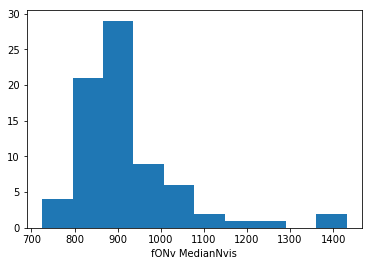

In [5]:
ack = plt.hist(fO, bins=10)
plt.xlabel('fONv MedianNvis')

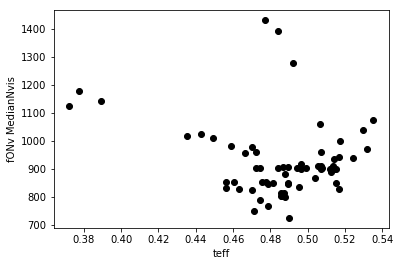

In [6]:
plt.plot(teff, fO, 'ko')
plt.xlabel('teff')
plt.ylabel('fONv MedianNvis')

In [7]:
dirs=np.array(dirs)

In [8]:
dirs[np.where(teff < 0.4)]

array(['/Users/yoachim/runs/all_db_ln/short_exp_5ns_5expt_v1.4_10yrs/',
       '/Users/yoachim/runs/all_db_ln/short_exp_5ns_1expt_v1.4_10yrs/',
       '/Users/yoachim/runs/all_db_ln/twilight_neo_mod1_v1.4_10yrs/'],
      dtype='<U69')

In [9]:
dirs[np.where(fO > 1200)]

array(['/Users/yoachim/runs/all_db_ln/footprint_stuck_rollingv1.4_10yrs/',
       '/Users/yoachim/runs/all_db_ln/weather_1.2_ndt_v1.4_10yrs/',
       '/Users/yoachim/runs/all_db_ln/weather_1.2_v1.4_10yrs/'],
      dtype='<U69')